# Unit 5 - Financial Planning

In [63]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [64]:
# Load .env enviroment variables
load_dotenv("env.txt")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [65]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [66]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [67]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_data

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_data

# Compute current value of my crpto
btc_current_value = btc_data['data']['1']['quotes']['USD']['price']
eth_current_value = eth_data['data']['1027']['quotes']['USD']['price']
btc_value = my_btc * btc_current_value
eth_value = my_eth * eth_current_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $34270.80
The current value of your 5.3 ETH is $8281.14


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [68]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [69]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [70]:
# Format current date as ISO format
today = pd.Timestamp("2023-10-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today,
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio["symbol"] == "SPY"].drop("symbol", axis=1)
AGG = df_portfolio[df_portfolio["symbol"] == "AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY,AGG], axis=1, keys=["SPY","AGG"])

# Preview DataFrame
df_portfolio

SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2023-10-19 04:00:00+00:00  429.58  432.82  427.72      566515  430.95   

                                                    AGG                 \
                             volume        vwap   close    high    low   
timestamp                                                                
2023-10-19 04:00:00+00:00  68654333  430.197702  91.785  92.165  91.61   

                                                                  
                          trade_count   open   volume       vwap  
timestamp                                                         
2023-10-19 04:00:00+00:00       26343  91.89  7071750  91.868452

In [71]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $91.785
Current SPY closing price: $429.58


/var/folders/l6/y384x_5543jb99ssghwm02dm0000gn/T/ipykernel_2167/4254263255.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price = float(df_portfolio["AGG"]["close"])
/var/folders/l6/y384x_5543jb99ssghwm02dm0000gn/T/ipykernel_2167/4254263255.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price = float(df_portfolio["SPY"]["close"])


In [72]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21479.00
The current value of your 200 AGG shares is $18357.00


### Savings Health Analysis

In [73]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = eth_value + btc_value
shares = my_agg_value + my_spy_value

amount_data = {
    "amount":[crypto,shares]}
index = ["crypto","shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(amount_data, index=index)

# Display savings DataFrame
df_savings

,amount
crypto,42551.944
shares,39836.000


<Axes: title={'center': 'Savings'}, ylabel='amount'>

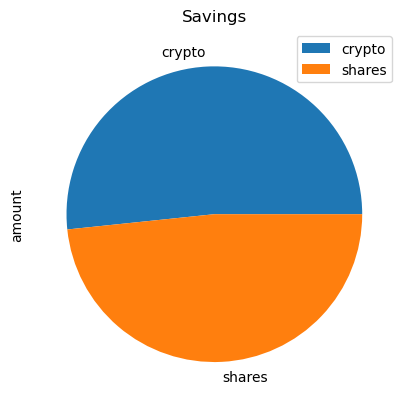

In [75]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings")

In [76]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print(f"You have enough money in your emergency fund")
elif total_savings == monthly_income:
    print(f"You have reached your financial goal")

You have enough money in your emergency fund


/var/folders/l6/y384x_5543jb99ssghwm02dm0000gn/T/ipykernel_2167/284463306.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  total_savings = float(df_savings.sum())


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [77]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-10-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-10-19', tz='America/New_York').isoformat()

In [82]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]

timeframe = "1Day"

df_stock_data = alpaca.get_bars(tickers,timeframe,start=start_date,end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data["symbol"] == "SPY"].drop("symbol", axis=1)
AGG = df_stock_data[df_stock_data["symbol"] == "AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY,AGG], axis=1, keys=["SPY","AGG"])

# Display sample data
df_stock_data.head()

SPY                                      \
                              close    high     low trade_count    open   
timestamp                                                                 
2018-10-19 04:00:00+00:00  276.1797  279.30  275.47      582243  277.13   
2018-10-22 04:00:00+00:00  275.0300  277.36  274.41      449535  277.00   
2018-10-23 04:00:00+00:00  273.5200  274.87  268.61      837023  270.95   
2018-10-24 04:00:00+00:00  265.2100  273.76  264.70      938613  273.33   
2018-10-25 04:00:00+00:00  270.0100  271.81  266.23      733954  267.38   

                                                     AGG                   \
                              volume        vwap   close    high      low   
timestamp                                                                   
2018-10-19 04:00:00+00:00  140662678  277.063759  104.37  104.55  104.340   
2018-10-22 04:00:00+00:00   83420677  275.565255  104.35  104.52  104.340   
2018-10-23 04:00:00+00:00  148031789  271.959702  104.48  104.74  104.475   
2018-10-24 04:00:00+00:00  180061325  269.071189  104.75  104.81  104.670   
2018-10-25 04:00:00+00:00  140353452  269.146254  104.66  104.77  104.610   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2018-10-19 04:00:00+00:00       13175  104.47   3105921  104.390878  
2018-10-22 04:00:00+00:00       11391  104.47   2948119  104.408492  
2018-10-23 04:00:00+00:00       14144  104.67   3695313  104.605860  
2018-10-24 04:00:00+00:00       17520  104.69   4849462  104.742653  
2018-10-25 04:00:00+00:00       15828  104.71  12638378  104.664656

In [83]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 100,
    num_trading_days = 252*30)

In [84]:
# Printing the simulation input data
MC_thirty_years.portfolio_data.head()

SPY                                      \
                              close    high     low trade_count    open   
timestamp                                                                 
2018-10-19 04:00:00+00:00  276.1797  279.30  275.47      582243  277.13   
2018-10-22 04:00:00+00:00  275.0300  277.36  274.41      449535  277.00   
2018-10-23 04:00:00+00:00  273.5200  274.87  268.61      837023  270.95   
2018-10-24 04:00:00+00:00  265.2100  273.76  264.70      938613  273.33   
2018-10-25 04:00:00+00:00  270.0100  271.81  266.23      733954  267.38   

                                                                  AGG          \
                              volume        vwap daily_return   close    high   
timestamp                                                                       
2018-10-19 04:00:00+00:00  140662678  277.063759          NaN  104.37  104.55   
2018-10-22 04:00:00+00:00   83420677  275.565255    -0.004163  104.35  104.52   
2018-10-23 04:00:00+00:00  148031789  271.959702    -0.005490  104.48  104.74   
2018-10-24 04:00:00+00:00  180061325  269.071189    -0.030382  104.75  104.81   
2018-10-25 04:00:00+00:00  140353452  269.146254     0.018099  104.66  104.77   

                                                                              \
                               low trade_count    open    volume        vwap   
timestamp                                                                      
2018-10-19 04:00:00+00:00  104.340       13175  104.47   3105921  104.390878   
2018-10-22 04:00:00+00:00  104.340       11391  104.47   2948119  104.408492   
2018-10-23 04:00:00+00:00  104.475       14144  104.67   3695313  104.605860   
2018-10-24 04:00:00+00:00  104.670       17520  104.69   4849462  104.742653   
2018-10-25 04:00:00+00:00  104.610       15828  104.71  12638378  104.664656   

                                        
                          daily_return  
timestamp                               
2018-10-19 04:00:00+00:00          NaN  
2018-10-22 04:00:00+00:00    -0.000192  
2018-10-23 04:00:00+00:00     0.001246  
2018-10-24 04:00:00+00:00     0.002584  
2018-10-25 04:00:00+00:00    -0.000859

In [85]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992982,0.998305,1.001709,0.999609,1.003841,0.992786,0.985153,1.005076,0.995638,1.012218,...,0.992251,1.004411,1.004288,1.008890,0.992044,0.980634,1.000817,0.999987,1.010614,1.002614
2,0.988624,0.993722,0.995768,1.005835,1.006326,0.985797,0.991639,1.008722,1.002693,1.024180,...,1.004760,0.989369,0.992674,1.015789,0.985869,0.990528,1.000811,1.004802,1.021213,1.016902
3,0.987271,0.997694,1.005372,1.010099,1.007010,0.984772,0.986169,1.002635,1.007252,1.025518,...,0.999621,0.983434,1.003983,1.010290,0.985084,0.999381,1.002767,0.998178,1.011144,1.011439
4,0.986235,1.005183,1.007981,1.016365,1.013373,0.996929,0.980522,1.009770,1.003106,1.023884,...,0.998863,0.983420,0.989401,1.014894,0.989864,0.989991,0.996030,0.984798,1.009882,1.031471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.670045,2.427511,1.271390,2.211510,1.553959,6.637161,1.666488,4.577192,3.223157,1.723095,...,5.121821,8.563889,1.087632,2.516052,1.804791,7.294228,2.065660,3.129030,2.903799,4.381400
7557,1.683064,2.428426,1.273677,2.215141,1.556686,6.646736,1.666324,4.566060,3.219862,1.724933,...,5.155368,8.572886,1.085655,2.538979,1.819909,7.282830,2.052994,3.124300,2.892982,4.381513
7558,1.683598,2.409332,1.283775,2.191936,1.554626,6.664900,1.681876,4.597524,3.207229,1.735337,...,5.164232,8.510289,1.095576,2.515633,1.801335,7.345394,2.050920,3.142798,2.915482,4.342072
7559,1.694510,2.429907,1.288503,2.185901,1.573452,6.651751,1.663114,4.573773,3.223904,1.752066,...,5.110283,8.501334,1.097084,2.490205,1.803252,7.322733,2.048062,3.131180,2.918981,4.351015


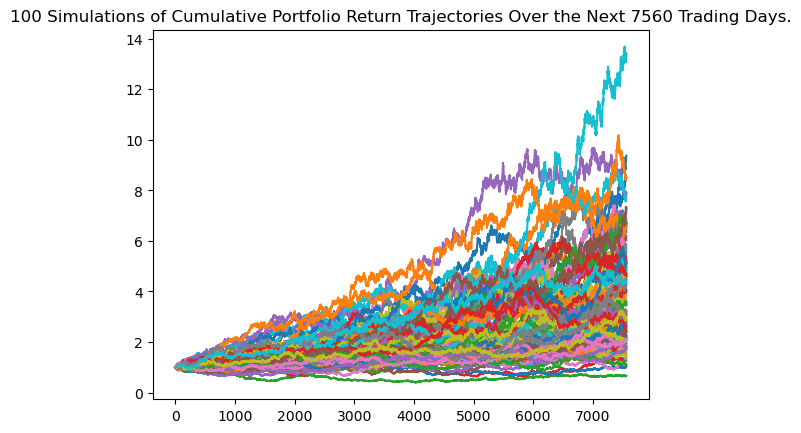

In [86]:
# Plot simulation outcomes
line_plot = MC_thirty_years.plot_simulation()

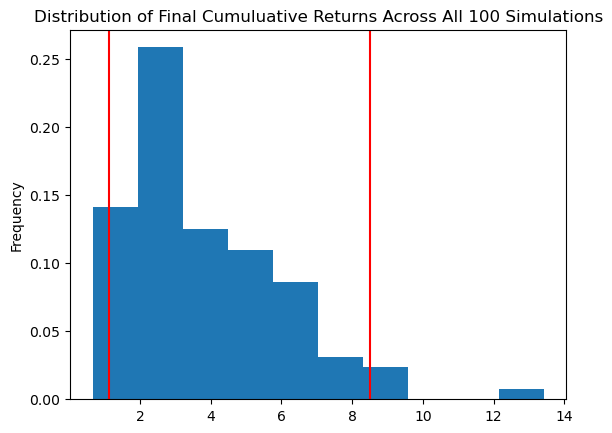

In [87]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_thirty_years.plot_distribution()

### Retirement Analysis

In [88]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_thirty_years.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           100.000000
mean              3.807267
std               2.222814
min               0.666106
25%               2.118541
50%               3.180694
75%               5.134517
max              13.418444
95% CI Lower      1.116254
95% CI Upper      8.496593
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [89]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $22325.08 and $169931.87


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [90]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $33487.62 and $254897.8


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [91]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.7,.3],
    num_simulation = 100,
    num_trading_days = 252*5)
    

In [92]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004187,1.008435,0.989778,0.996710,1.006788,0.992850,0.997851,1.015973,0.993487,0.985442,...,1.003686,0.995080,0.995205,0.993446,1.006963,1.000971,0.994630,0.997349,1.005248,1.005861
2,1.003093,1.006417,0.984686,0.993137,1.017276,0.998738,1.008088,0.999830,0.998632,0.977605,...,1.008879,1.003286,1.005359,0.977183,1.019409,1.002823,0.999495,0.987039,0.996996,0.982125
3,1.014003,1.004810,0.984280,0.988962,1.007319,0.999440,1.011544,1.007439,0.994278,0.994365,...,0.998323,1.000788,1.019904,0.984659,1.032282,1.015303,0.991796,0.986417,0.978654,0.973822
4,1.011860,1.011357,0.979335,0.985974,1.002014,0.985363,1.004993,0.997965,1.003042,0.988502,...,1.000983,0.993944,1.009630,0.979164,1.017922,1.017029,0.987346,0.987984,0.969852,0.970607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.673133,0.933913,1.257993,2.009748,1.063931,1.881695,2.226987,1.068381,1.126524,0.927275,...,1.055568,1.096912,1.188266,1.398228,1.265386,1.443228,1.483873,1.391910,1.196566,1.982760
1257,1.690778,0.943858,1.256570,1.999993,1.081721,1.893398,2.212609,1.069638,1.133312,0.928757,...,1.058793,1.112508,1.168589,1.392075,1.261948,1.449107,1.473931,1.394437,1.199837,1.985312
1258,1.696531,0.941523,1.244155,2.028635,1.084247,1.899008,2.230302,1.057793,1.146966,0.924795,...,1.069193,1.121371,1.168709,1.413132,1.262991,1.462310,1.467984,1.421621,1.191785,1.985432
1259,1.675479,0.940595,1.231736,2.023123,1.093265,1.915025,2.232409,1.061986,1.124017,0.931837,...,1.086053,1.115376,1.179675,1.416539,1.275053,1.476911,1.440722,1.426356,1.188043,1.971702


<Axes: title={'center': '100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

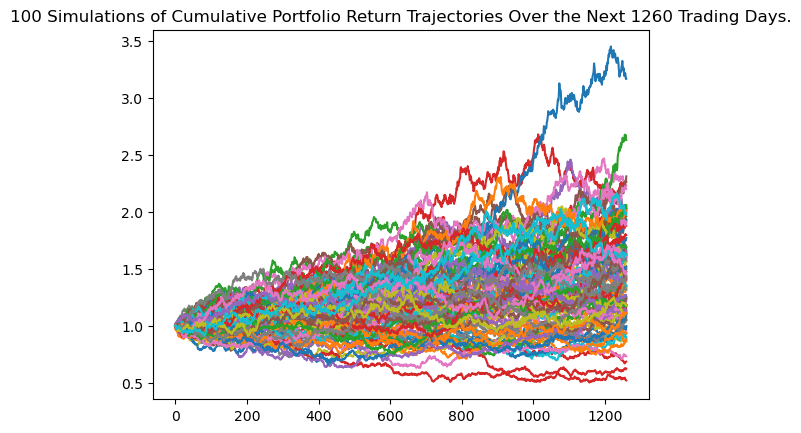

In [94]:
# Plot simulation outcomes
MC_five_year.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

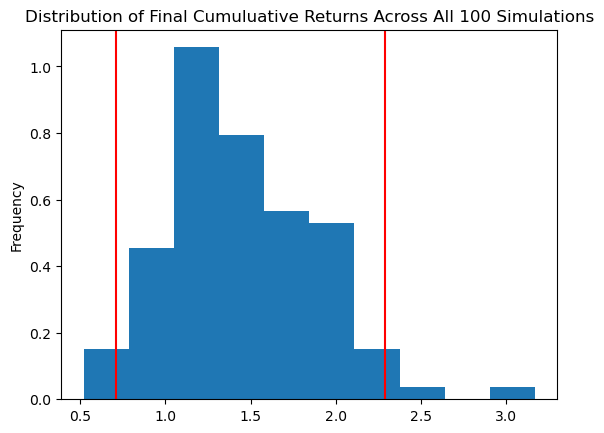

In [95]:
# Plot probability distribution and confidence intervals
MC_five_year.plot_distribution()

In [96]:
# Fetch summary statistics from the Monte Carlo simulation results
five_summary = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(five_summary)

count           100.000000
mean              1.438667
std               0.449460
min               0.521708
25%               1.122904
50%               1.378893
75%               1.658271
max               3.168949
95% CI Lower      0.709115
95% CI Upper      2.290099
Name: 1260, dtype: float64


In [97]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_summary[8]*initial_investment,2)
ci_upper_five = round(five_summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $42546.91 and $137405.95


### Ten Years Retirement Option

In [98]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.7,.3],
    num_simulation = 100,
    num_trading_days = 252*10)

In [99]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006482,0.995118,1.003075,0.998669,1.002549,0.996347,0.994484,0.981811,0.992631,1.006064,...,1.000667,1.005075,1.003234,1.002436,0.995144,0.990743,1.003827,1.006768,1.001406,0.999342
2,0.989425,0.995859,1.024532,1.002929,0.998041,1.006461,0.996300,0.966870,1.001236,1.014353,...,1.002423,1.015096,1.017312,1.008891,1.003340,1.003130,0.991053,1.007900,0.990265,0.992861
3,0.982915,0.994794,1.028186,1.003145,1.018543,1.000230,1.005337,0.961728,0.986722,0.999315,...,0.999234,1.049735,1.016053,0.997370,1.008421,1.002429,0.977482,0.994886,0.994844,0.992051
4,0.979989,0.983729,1.011629,1.000181,1.031321,0.999450,1.020913,0.966305,0.991911,0.999856,...,1.003369,1.045656,1.026287,0.999083,1.002136,1.009328,0.964094,0.989513,1.001858,0.978693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.114684,4.184700,1.260855,1.452040,1.193326,1.141636,1.398624,3.043435,2.443117,2.646015,...,0.938341,1.431853,1.856568,2.544438,2.506627,1.516241,1.477660,1.186636,1.794785,1.273960
2517,1.115370,4.148361,1.276922,1.446986,1.195922,1.138496,1.407316,3.059206,2.440492,2.645435,...,0.940402,1.444585,1.850201,2.528189,2.477196,1.518508,1.469884,1.191132,1.786847,1.244289
2518,1.108187,4.131411,1.291616,1.437125,1.196251,1.155807,1.429694,3.050360,2.427785,2.641488,...,0.939363,1.439931,1.858289,2.527987,2.476776,1.550920,1.454000,1.176719,1.803644,1.259496
2519,1.112057,4.129089,1.299200,1.440824,1.181849,1.153825,1.409436,3.037461,2.425236,2.633833,...,0.939933,1.444860,1.833842,2.494367,2.441975,1.562618,1.442355,1.168936,1.826331,1.262293


<Axes: title={'center': '100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

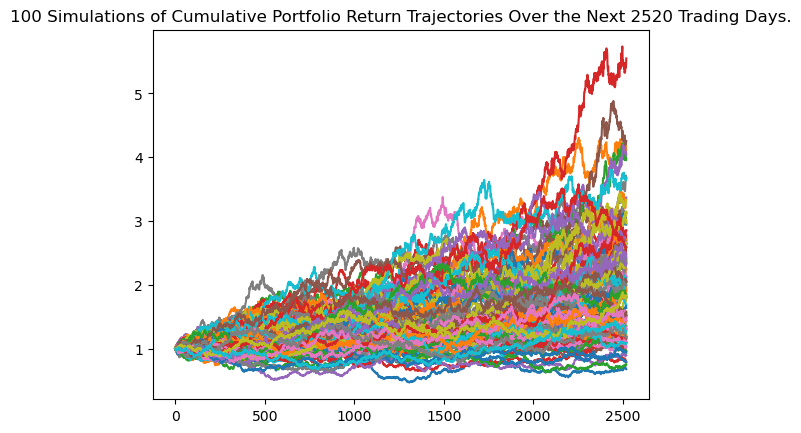

In [100]:
# Plot simulation outcomes
MC_ten_year.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

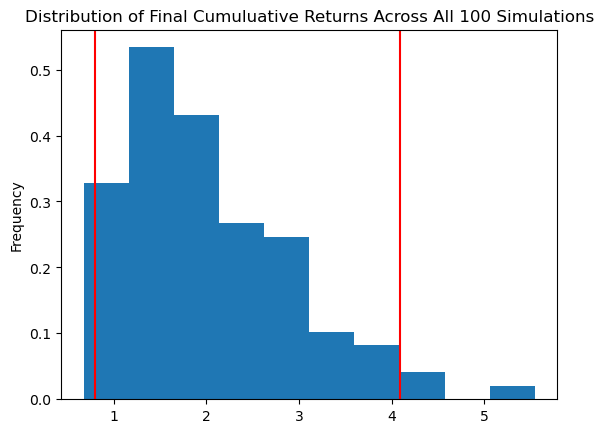

In [101]:
# Plot probability distribution and confidence intervals
MC_ten_year.plot_distribution()

In [102]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_summary = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(ten_summary)

count           100.000000
mean              2.027263
std               0.911306
min               0.677654
25%               1.296465
50%               1.896777
75%               2.589034
max               5.548254
95% CI Lower      0.792124
95% CI Upper      4.088779
Name: 2520, dtype: float64


In [103]:
# Set initial investment
initial_invesment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_summary[8]*initial_investment,2)
ci_upper_ten = round(ten_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $47527.43 and $245326.75
